In [3]:
import pandas as pd
import numpy as np
from google.colab import files
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy import stats
import statistics
import matplotlib.ticker as mtick
import statsmodels.api as sm
from scipy import stats
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# A. Estimating correlation matrices and betas for all asset classes by stage


This part of the analysis estimates correlations among assets. It includes all observations from all stages that have complete information. 

## 1. Treasuries, Bonds, Commodities and S&P 500


### 1.1. Correlation matrix - dark green stage

In [ ]:
## the files contain the retunrs of each asset during the dark green stage
file_name=files.upload()
name='dark_green_deltas.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
df.head()

Saving dark_green_deltas.csv to dark_green_deltas.csv


,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/10/1975,dark green,0.010732,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/10/1975,dark green,0.010732,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/10/1975,dark green,0.025412,NaN,NaN,NaN,NaN,NaN,NaN
3,1,06/10/1975,dark green,0.010820,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/10/1975,dark green,-0.001266,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1.1. GSPC, SHY, IEF, TLT, GLD, DBC, IGLB (all periods)

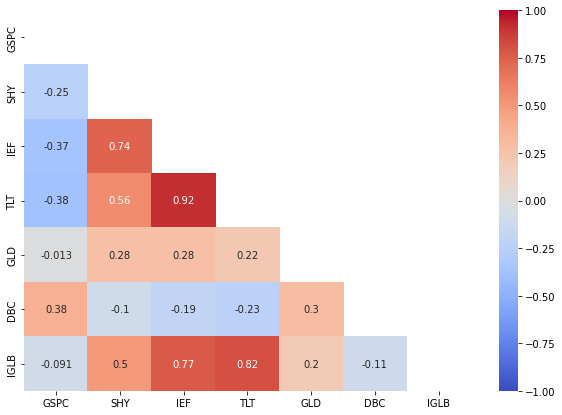

In [ ]:
## This is the correlation matrix for all of the assets against the S&P 500 (GSPC). 
## Information is complete for all assets after period 9, which starts in 
filtered_df = df.loc[(df['Period'] >= 9)]
X_f=filtered_df.iloc[:,[3,4,5,6,7,8,9]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

### 1.1.2. GSPC, SHY, IEF, TLT (treasuries)


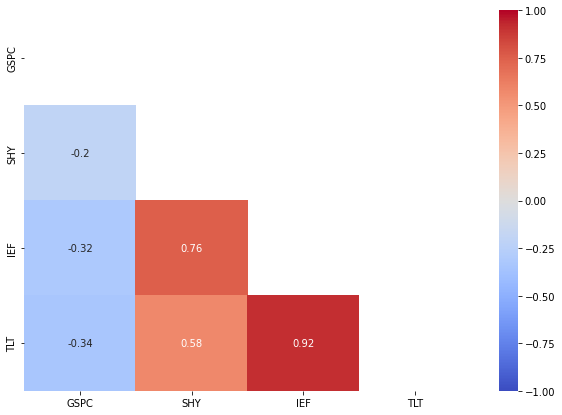

In [ ]:
## This adds a few periods, dating back to 2003. Correlation with treasuries changes magnitude but not sign
filtered_df = df.loc[(df['Period'] >= 7)]
X_f=filtered_df.iloc[:,[3,4,5,6]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

### 1.2 Correlation matrix - light green stage

In [4]:
file_name=files.upload()
name='light_green_deltas.csv'
## Reading the file in 
df2=pd.read_csv(name, sep=',')
rows=df2.shape[0] #number of rows
columns=df2.shape[1]  #number of columns
df2.head()

Saving light_green_deltas.csv to light_green_deltas.csv


,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/04/1975,light green,-0.002541,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/04/1975,light green,-0.002541,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/04/1975,light green,-0.011161,NaN,NaN,NaN,NaN,NaN,NaN
3,1,04/04/1975,light green,-0.007729,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/04/1975,light green,-0.006553,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.2.1 GSPC, SHY, IEF, TLT, GLD, DBC, IGLB (all)

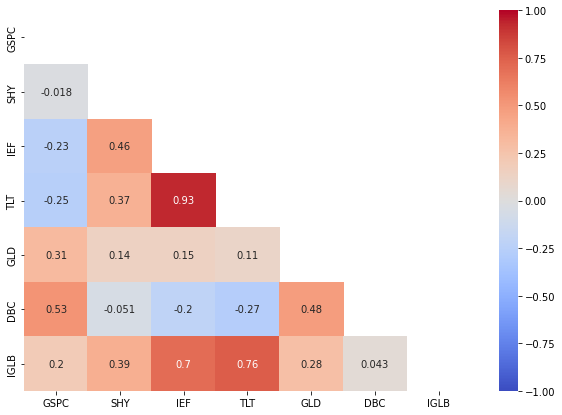

In [ ]:
## The complete matrix can only be calculated for one period, starting in july of 2020. Additional time periods are calculated below. 
filtered_df = df2.loc[(df2['Period'] >= 7)]
X_f=filtered_df.iloc[:,[3,4,5,6,7,8,9]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

#### 1.2.2 GSPC, SHY, IEF, TLT (treasuries)


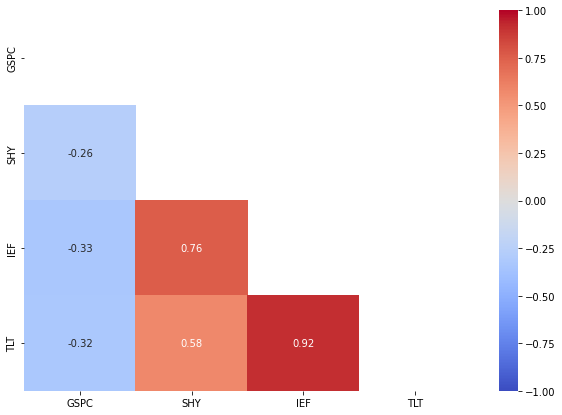

In [ ]:
## This matrix includes the Jun 2009 - Mar 2010 and Jul 2020 - Oct 2020
filtered_df = df2.loc[(df2['Period'] >= 6)]
X_f=filtered_df.iloc[:,[3,4,5,6]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

When including one more period, the size of the correlations increase. 

#### 1.2.2 GSPC,GLD, DBC (Commodities)

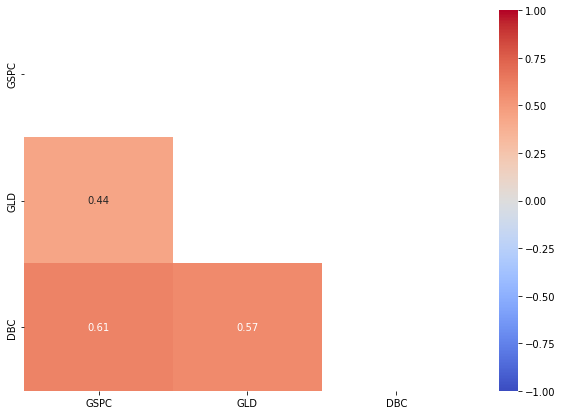

In [ ]:
filtered_df = df2.loc[(df2['Period'] >= 6)]
X_f=filtered_df.iloc[:,[3,7,8]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

When including one more period, the sizes of the correlations increase. 

### 1.3 Correlation matrices - orange phase

In [ ]:
file_name=files.upload()
name='orange_deltas.csv'
## Reading the file in 
df3=pd.read_csv(name, sep=',')
rows=df3.shape[0] #number of rows
columns=df3.shape[1]  #number of columns
df3.head()

Saving orange_deltas.csv to orange_deltas.csv


,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/05/1973,orange,0.012418,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/05/1973,orange,0.012418,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/05/1973,orange,0.016508,NaN,NaN,NaN,NaN,NaN,NaN
3,1,04/05/1973,orange,0.007077,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/05/1973,orange,-0.004234,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3.1  GSPC, SHY, IEF, TLT, GLD, DBC, IGLB (all)

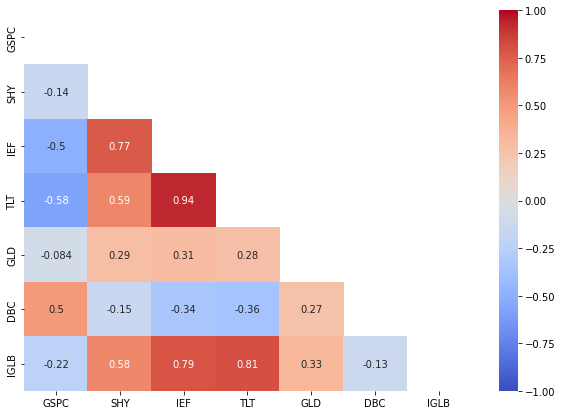

In [ ]:
## Includes 4 deceleration periods dating back to Sep 2011
filtered_df = df3.loc[(df3['Period'] >= 11)]
X_f=filtered_df.iloc[:,[3,4,5,6,7,8,9]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

#### 1.3.2. GSPC, SHY, IEF, TLT (treasuries)


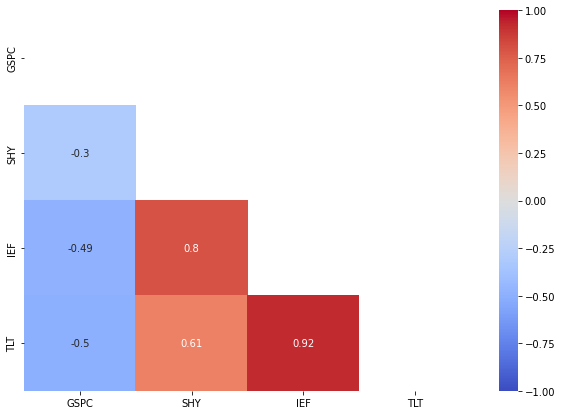

In [ ]:
## Includes 7 deceleration periods dating back to Oct 2002
filtered_df = df3.loc[(df3['Period'] >= 8)]
X_f=filtered_df.iloc[:,[3,4,5,6]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

### 1.3.3. GSPC,GLD, DBC (Commodities)

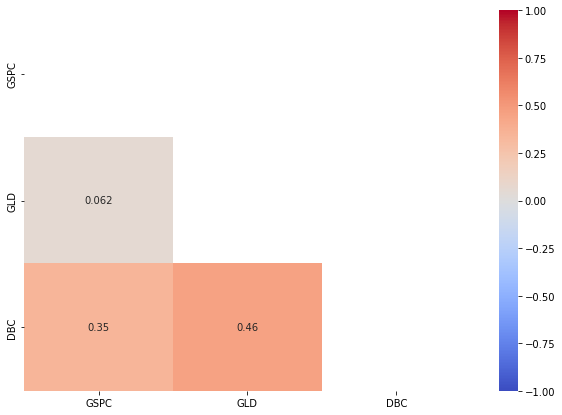

In [ ]:
## Includes 5 periods dating back to 2006
filtered_df = df3.loc[(df3['Period'] >= 10)]
X_f=filtered_df.iloc[:,[3,7,8]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

### 1.4 Correlation matrices - red stage

In [ ]:
file_name=files.upload()
name='red_deltas.csv'
## Reading the file in 
df4=pd.read_csv(name, sep=',')
rows=df4.shape[0] #number of rows
columns=df4.shape[1]  #number of columns
df4.head()

Saving red_deltas.csv to red_deltas.csv


,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,03/12/1973,red,-0.003301,NaN,NaN,NaN,NaN,NaN,NaN
1,1,04/12/1973,red,-0.003301,NaN,NaN,NaN,NaN,NaN,NaN
2,1,05/12/1973,red,-0.015279,NaN,NaN,NaN,NaN,NaN,NaN
3,1,06/12/1973,red,0.024523,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/12/1973,red,0.022135,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4.1 GSPC, SHY, IEF, TLT, GLD, DBC, IGLB (all)

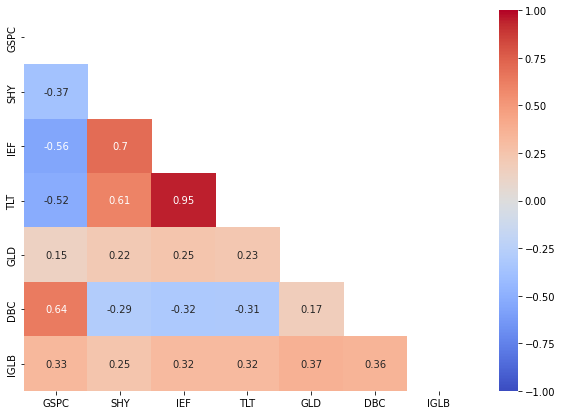

In [ ]:
## The matrix for all assets dates back to 2020. It only includes one period
filtered_df = df4.loc[(df4['Period'] >=7)]
X_f=filtered_df.iloc[:,[3,4,5,6,7,8,9]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

#### 1.4.2 GSPC, SHY, IEF, TLT (treasuries)


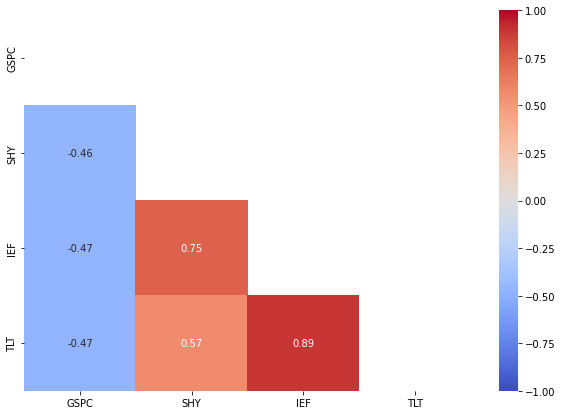

In [ ]:
# This matrix includes two periods. November 2007 - May 2009 and March 2020 - June 2020
filtered_df = df4.loc[(df4['Period'] >= 6)]
X_f=filtered_df.iloc[:,[3,4,5,6]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

### GSPC,GLD, DBC (Commodities)

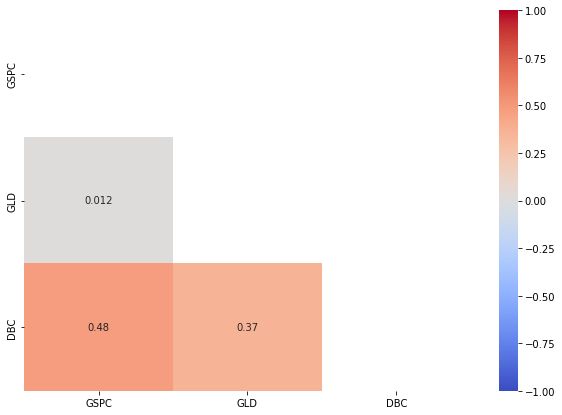

In [ ]:
# This matrix includes two periods. November 2007 - May 2009 and March 2020 - June 2020
filtered_df = df4.loc[(df4['Period'] >= 6)]
X_f=filtered_df.iloc[:,[3,7,8]]
 
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()
# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

## 2. Other equities indices and S&P 500

### 2.1 Correlation matrices - dark green phase


In [ ]:
file_name=files.upload()
name='dark_green_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,01/10/1975,dark green,82.930000,73.800003,NaN,NaN,0.010732,0.004878,NaN,NaN
1,1,02/10/1975,dark green,83.820000,74.160004,NaN,NaN,0.010732,0.004878,NaN,NaN
2,1,03/10/1975,dark green,85.949997,75.500000,NaN,NaN,0.025412,0.018069,NaN,NaN
3,1,06/10/1975,dark green,86.879997,76.029999,NaN,NaN,0.010820,0.007020,NaN,NaN
4,1,07/10/1975,dark green,86.769997,75.879997,NaN,NaN,-0.001266,-0.001973,NaN,NaN


In [ ]:
## Filtered after June 2002 
filtered_df = df.loc[(df['Period'] >= 6)]
X_f=filtered_df.iloc[:,[7,8,9,10]]
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 4277 to 7735
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d_GSPC  3459 non-null   float64
 1   d_IXIC  3459 non-null   float64
 2   d_DJI   3459 non-null   float64
 3   d_IWM   3459 non-null   float64
dtypes: float64(4)
memory usage: 135.1 KB


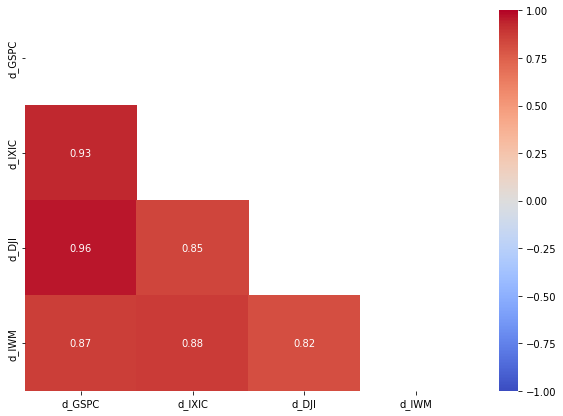

In [ ]:
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

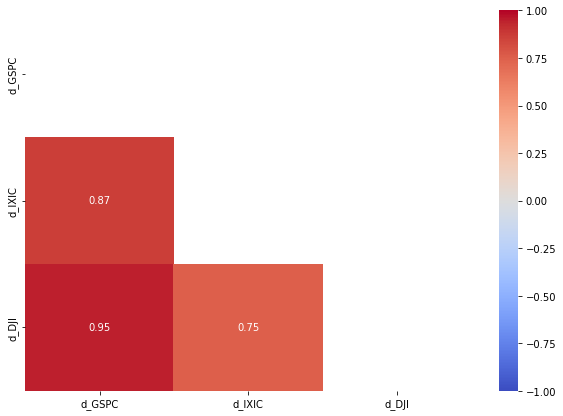

In [ ]:
## There is more information in the database for Dow Jones and Nasdaq
## We filter back to April 1994
filtered_df2 = df.loc[(df['Period'] >= 3)]
X_f2=filtered_df2.iloc[:,[7,8,9]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

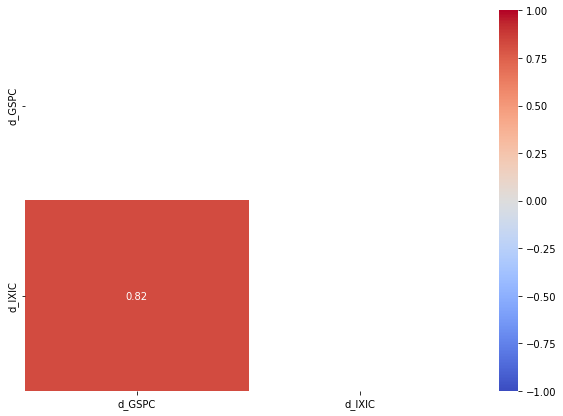

In [ ]:
## dating back to 1973
filtered_df2 = df.loc[(df['Period'] >= 1)]
X_f2=filtered_df2.iloc[:,[7,8]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

### 2.2 Correlation matrices - light green phase


In [ ]:
file_name=files.upload()
name='light_green_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,01/04/1975,light green,82.639999,75.419998,NaN,NaN,-0.002541,0.002652,NaN,NaN
1,1,02/04/1975,light green,82.430000,75.620003,NaN,NaN,-0.002541,0.002652,NaN,NaN
2,1,03/04/1975,light green,81.510002,74.949997,NaN,NaN,-0.011161,-0.008860,NaN,NaN
3,1,04/04/1975,light green,80.879997,74.730003,NaN,NaN,-0.007729,-0.002935,NaN,NaN
4,1,07/04/1975,light green,80.349998,74.339996,NaN,NaN,-0.006553,-0.005219,NaN,NaN


In [ ]:
## The data is selected back december to 2001
filtered_df = df.loc[(df['Period'] >= 5)]
X_f=filtered_df.iloc[:,[7,8,9,10]]
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 657 to 1077
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d_GSPC  421 non-null    float64
 1   d_IXIC  421 non-null    float64
 2   d_DJI   421 non-null    float64
 3   d_IWM   421 non-null    float64
dtypes: float64(4)
memory usage: 16.4 KB


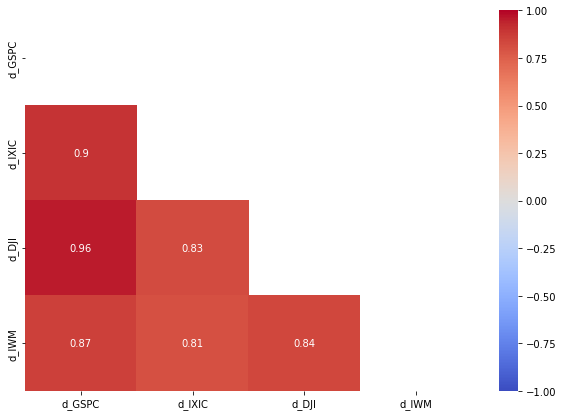

In [ ]:
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

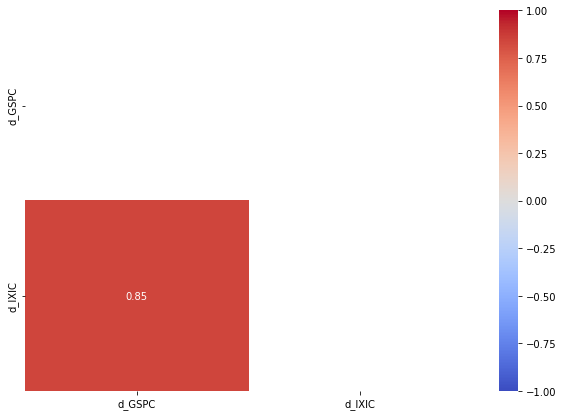

In [ ]:
# Data back to april 1975
filtered_df2 = df.loc[(df['Period'] >= 1)]
X_f2=filtered_df2.iloc[:,[7,8]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

### 2.3 Correlation matrices - orange phase

In [ ]:
file_name=files.upload()
name='orange_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,01/05/1973,orange,107.099998,107.959999,NaN,NaN,0.012418,0.010096,NaN,NaN
1,1,02/05/1973,orange,108.430000,109.050003,NaN,NaN,0.012418,0.010096,NaN,NaN
2,1,03/05/1973,orange,110.220001,109.809998,NaN,NaN,0.016508,0.006969,NaN,NaN
3,1,04/05/1973,orange,111.000000,110.889999,NaN,NaN,0.007077,0.009835,NaN,NaN
4,1,07/05/1973,orange,110.529999,110.480003,NaN,NaN,-0.004234,-0.003697,NaN,NaN


In [ ]:
## Data starts in Augusto of 2000 
filtered_df = df.loc[(df['Period'] >= 7)]
X_f=filtered_df.iloc[:,[7,8,9,10]]
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 992 to 1896
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d_GSPC  905 non-null    float64
 1   d_IXIC  905 non-null    float64
 2   d_DJI   905 non-null    float64
 3   d_IWM   905 non-null    float64
dtypes: float64(4)
memory usage: 35.4 KB


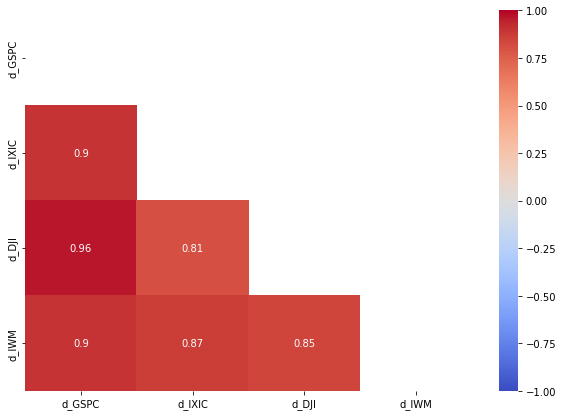

In [ ]:
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

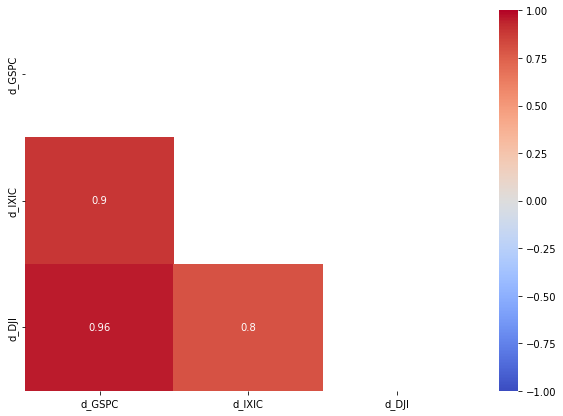

In [ ]:
# Data starts in February 1996
filtered_df2 = df.loc[(df['Period'] >= 5)]
X_f2=filtered_df2.iloc[:,[7,8,9]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

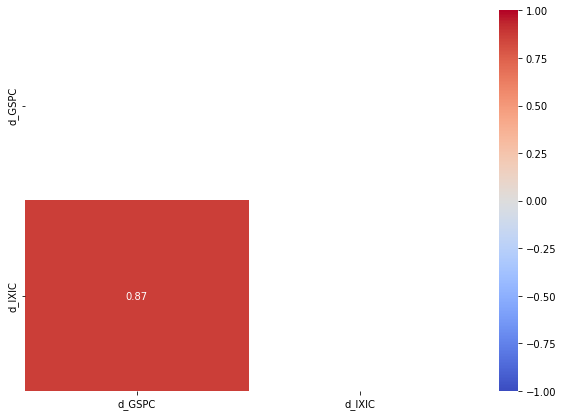

In [ ]:
#Data starts in may of 1975
filtered_df2 = df.loc[(df['Period'] >= 1)]
X_f2=filtered_df2.iloc[:,[7,8]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

### 2.4 Correlation matrices - red phase

In [ ]:
file_name=files.upload()
name='red_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,03/12/1973,red,93.900002,91.970001,NaN,NaN,-0.003301,-0.004458,NaN,NaN
1,1,04/12/1973,red,93.589996,91.559998,NaN,NaN,-0.003301,-0.004458,NaN,NaN
2,1,05/12/1973,red,92.160004,89.730003,NaN,NaN,-0.015279,-0.019987,NaN,NaN
3,1,06/12/1973,red,94.419998,91.269997,NaN,NaN,0.024523,0.017163,NaN,NaN
4,1,07/12/1973,red,96.510002,92.320000,NaN,NaN,0.022135,0.011504,NaN,NaN


In [ ]:
## Data starts in december of 2000
filtered_df = df.loc[(df['Period'] >= 5)]
X_f=filtered_df.iloc[:,[7,8,9,10]]
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 962 to 1690
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d_GSPC  729 non-null    float64
 1   d_IXIC  729 non-null    float64
 2   d_DJI   729 non-null    float64
 3   d_IWM   729 non-null    float64
dtypes: float64(4)
memory usage: 28.5 KB


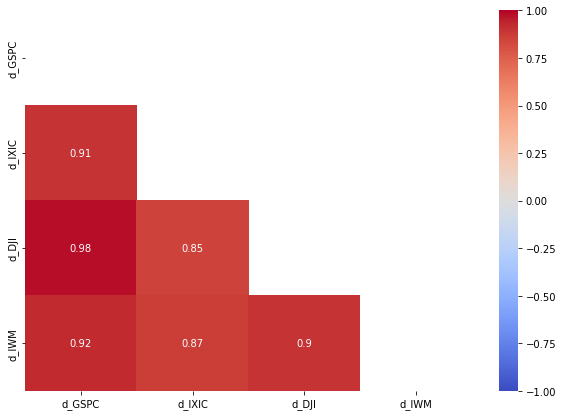

In [ ]:
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

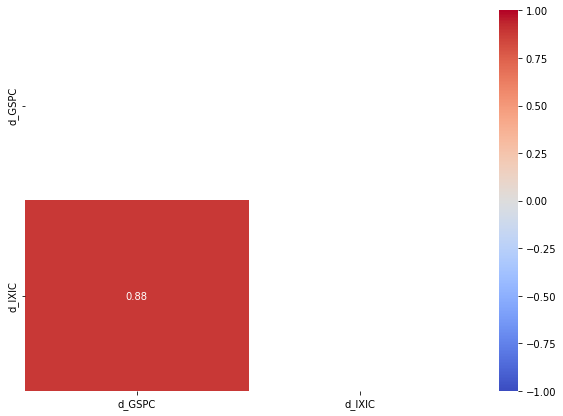

In [ ]:
filtered_df2 = df.loc[(df['Period'] >= 1)]
X_f2=filtered_df2.iloc[:,[7,8]]
# We caluclate all correlations and assign them to corr_mat
corr_mat_f2= X_f2.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f2 = np.triu(corr_mat_f2)
sns.heatmap(corr_mat_f2, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f2)
plt.show();

# B. Beta analysis. Each asset against S&P 500

## 1. Treasuries, Bonds, Commodities and S&P 500


### 1.1 Calculating betas - all stages

In [7]:
file_name=files.upload()
name='treasures_bonds_comodities_2010.csv'
## Reading the file in 
df5=pd.read_csv(name, sep=',')
rows=df5.shape[0] #number of rows
columns=df5.shape[1]  #number of columns
 
df5.head()

Saving treasures_bonds_comodities_2010.csv to treasures_bonds_comodities_2010.csv


,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,01/04/2010,dark green,0.007414,-0.000360,-0.002073,-0.002447,0.012024,0.019558,-0.013831
1,05/04/2010,dark green,0.007928,-0.002763,-0.008982,-0.016638,0.005714,0.015847,-0.013831
2,06/04/2010,dark green,0.001684,0.000723,0.002945,0.001600,0.001263,-0.000821,0.004207
3,07/04/2010,dark green,-0.005877,0.001565,0.006213,0.012785,0.013150,-0.003698,0.007582
4,08/04/2010,dark green,0.003374,-0.000240,-0.001123,0.000450,0.001422,-0.001650,0.000000


#### SHY

In [8]:
 
y=df5['SHY']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SHY   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           5.65e-41
Time:                        17:10:25   Log-Likelihood:                 18394.
No. Observations:                3084   AIC:                        -3.678e+04
Df Residuals:                    3082   BIC:                        -3.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.687e-05   1.12e-05      3.290      0.001    1.49e-05    5.88e-05
GSPC          -0.0137      0.001    -13.604      0.000      -0.016      -0.012
==============================================================================
Omnibus:                      601.434   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12241.513
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                      12.734   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IEF

In [ ]:
 
y=df5['IEF']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     573.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.94e-116
Time:                        00:24:20   Log-Likelihood:                 12977.
No. Observations:                3084   AIC:                        -2.595e+04
Df Residuals:                    3082   BIC:                        -2.594e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.49e-05      2.902      0.004    6.11e-05       0.000
GSPC          -0.1400      0.006    -23.955      0.000      -0.151      -0.129
==============================================================================
Omnibus:                      328.211   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.774
Skew:                          -0.507   Prob(JB):                    3.91e-252
Kurtosis:                       5.825   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TLT

In [ ]:
 
y=df5['TLT']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     670.6
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          6.00e-134
Time:                        00:24:29   Log-Likelihood:                 10333.
No. Observations:                3084   AIC:                        -2.066e+04
Df Residuals:                    3082   BIC:                        -2.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.523      0.012    8.61e-05       0.001
GSPC          -0.3567      0.014    -25.896      0.000      -0.384      -0.330
==============================================================================
Omnibus:                      450.352   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2961.748
Skew:                          -0.515   Prob(JB):                         0.00
Kurtosis:                       7.689   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLD

In [ ]:
 
y=df5['GLD']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4572
Date:                Sat, 23 Jul 2022   Prob (F-statistic):              0.499
Time:                        00:24:36   Log-Likelihood:                 9873.3
No. Observations:                3084   AIC:                        -1.974e+04
Df Residuals:                    3082   BIC:                        -1.973e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.043      0.297      -0.000       0.001
GSPC           0.0108      0.016      0.676      0.499      -0.021       0.042
==============================================================================
Omnibus:                      446.216   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3270.041
Skew:                          -0.469   Prob(JB):                         0.00
Kurtosis:                       7.957   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DBC

In [ ]:
 
y=df5['DBC']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     683.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          3.66e-136
Time:                        00:24:44   Log-Likelihood:                 9899.4
No. Observations:                3084   AIC:                        -1.979e+04
Df Residuals:                    3082   BIC:                        -1.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.519e-05      0.000     -0.427      0.669      -0.000       0.000
GSPC           0.4143      0.016     26.134      0.000       0.383       0.445
==============================================================================
Omnibus:                      425.374   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2968.113
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       7.721   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IGLB

In [ ]:
 
y=df5['IGLB']
X=df5['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IGLB   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.553
Date:                Sat, 23 Jul 2022   Prob (F-statistic):              0.110
Time:                        00:24:54   Log-Likelihood:                 10886.
No. Observations:                3084   AIC:                        -2.177e+04
Df Residuals:                    3082   BIC:                        -2.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.505      0.133   -5.83e-05       0.000
GSPC           0.0184      0.012      1.598      0.110      -0.004       0.041
==============================================================================
Omnibus:                      956.312   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136091.321
Skew:                           0.280   Prob(JB):                         0.00
Kurtosis:                      35.539   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.2. Calculating betas - orange stage

In [ ]:
file_name=files.upload()
name='orange_deltas.csv'
## Reading the file in 
df5=pd.read_csv(name, sep=',')
rows=df5.shape[0] #number of rows
columns=df5.shape[1]  #number of columns
 
df5.head()

,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/05/1973,orange,0.012418,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/05/1973,orange,0.012418,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/05/1973,orange,0.016508,NaN,NaN,NaN,NaN,NaN,NaN
3,1,04/05/1973,orange,0.007077,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/05/1973,orange,-0.004234,NaN,NaN,NaN,NaN,NaN,NaN


#### SHY

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=8)]
X_f3=filtered_df.iloc[:,[3,4]]
y=X_f3['SHY']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SHY   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     81.89
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.03e-18
Time:                        21:18:30   Log-Likelihood:                 4624.7
No. Observations:                 819   AIC:                            -9245.
Df Residuals:                     817   BIC:                            -9236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   2.99e-05      5.329      0.000       0.000       0.000
GSPC          -0.0241      0.003     -9.049      0.000      -0.029      -0.019
==============================================================================
Omnibus:                      130.967   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.366
Skew:                          -0.446   Prob(JB):                    4.16e-235
Kurtosis:                       8.553   Cond. No.                         89.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IEF

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=8)]
X_f3=filtered_df.iloc[:,[3,5]]
y=X_f3['IEF']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           2.55e-50
Time:                        21:18:30   Log-Likelihood:                 3502.0
No. Observations:                 819   AIC:                            -7000.
Df Residuals:                     817   BIC:                            -6991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.250      0.001       0.000       0.001
GSPC          -0.1678      0.010    -15.998      0.000      -0.188      -0.147
==============================================================================
Omnibus:                      135.186   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.318
Skew:                          -0.581   Prob(JB):                    1.36e-180
Kurtosis:                       7.788   Cond. No.                         89.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TLT

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=8)]
X_f3=filtered_df.iloc[:,[3,6]]
y=X_f3['TLT']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     270.8
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           9.07e-53
Time:                        21:18:30   Log-Likelihood:                 2890.9
No. Observations:                 819   AIC:                            -5778.
Df Residuals:                     817   BIC:                            -5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.036      0.002       0.000       0.001
GSPC          -0.3640      0.022    -16.456      0.000      -0.407      -0.321
==============================================================================
Omnibus:                       70.326   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.360
Skew:                          -0.148   Prob(JB):                     1.52e-78
Kurtosis:                       6.227   Cond. No.                         89.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLD

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=10)]
X_f3=filtered_df.iloc[:,[3,7]]
y=X_f3['GLD']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.776
Date:                Fri, 22 Jul 2022   Prob (F-statistic):             0.0961
Time:                        21:18:30   Log-Likelihood:                 2142.3
No. Observations:                 713   AIC:                            -4281.
Df Residuals:                     711   BIC:                            -4272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.410      0.159      -0.000       0.002
GSPC           0.0725      0.044      1.666      0.096      -0.013       0.158
==============================================================================
Omnibus:                       88.807   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.931
Skew:                          -0.536   Prob(JB):                     6.18e-72
Kurtosis:                       6.144   Cond. No.                         96.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DBC

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=10)]
X_f3=filtered_df.iloc[:,[3,8]]
y=X_f3['DBC']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     99.56
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           4.94e-22
Time:                        21:18:30   Log-Likelihood:                 2214.5
No. Observations:                 713   AIC:                            -4425.
Df Residuals:                     711   BIC:                            -4416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.361      0.718      -0.001       0.001
GSPC           0.3925      0.039      9.978      0.000       0.315       0.470
==============================================================================
Omnibus:                        5.108   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                6.164
Skew:                          -0.070   Prob(JB):                       0.0459
Kurtosis:                       3.434   Cond. No.                         96.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IGLB

In [ ]:
filtered_df = df5.loc[(df5['Period'] >=11)]
X_f3=filtered_df.iloc[:,[3,9]]
y=X_f3['IGLB']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IGLB   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     17.55
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           3.60e-05
Time:                        21:18:30   Log-Likelihood:                 1229.8
No. Observations:                 333   AIC:                            -2456.
Df Residuals:                     331   BIC:                            -2448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.720      0.086   -8.19e-05       0.001
GSPC          -0.1116      0.027     -4.189      0.000      -0.164      -0.059
==============================================================================
Omnibus:                       79.584   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.783
Skew:                          -0.893   Prob(JB):                     3.10e-86
Kurtosis:                       8.019   Cond. No.                         80.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.3 Calculating betas - red stage


In [ ]:
file_name=files.upload()
name='red_deltas.csv'
## Reading the file in 
df6=pd.read_csv(name, sep=',')
rows=df6.shape[0] #number of rows
columns=df6.shape[1]  #number of columns
 
df6.head()

,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,03/12/1973,red,-0.003301,NaN,NaN,NaN,NaN,NaN,NaN
1,1,04/12/1973,red,-0.003301,NaN,NaN,NaN,NaN,NaN,NaN
2,1,05/12/1973,red,-0.015279,NaN,NaN,NaN,NaN,NaN,NaN
3,1,06/12/1973,red,0.024523,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/12/1973,red,0.022135,NaN,NaN,NaN,NaN,NaN,NaN


#### SHY

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,4]]
y=X_f3['SHY']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SHY   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     130.0
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           8.16e-27
Time:                        03:57:20   Log-Likelihood:                 2469.0
No. Observations:                 481   AIC:                            -4934.
Df Residuals:                     479   BIC:                            -4926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.52e-05      2.881      0.004    5.98e-05       0.000
GSPC          -0.0284      0.002    -11.403      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       22.339   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.440
Skew:                          -0.233   Prob(JB):                     5.00e-11
Kurtosis:                       4.466   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IEF

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,5]]
y=X_f3['IEF']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     136.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           6.39e-28
Time:                        03:57:20   Log-Likelihood:                 1806.9
No. Observations:                 481   AIC:                            -3610.
Df Residuals:                     479   BIC:                            -3601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.292      0.197      -0.000       0.001
GSPC          -0.1154      0.010    -11.683      0.000      -0.135      -0.096
==============================================================================
Omnibus:                       66.481   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.014
Skew:                           0.362   Prob(JB):                     5.12e-93
Kurtosis:                       7.548   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TLT

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,6]]
y=X_f3['TLT']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     135.6
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           9.20e-28
Time:                        03:57:21   Log-Likelihood:                 1446.1
No. Observations:                 481   AIC:                            -2888.
Df Residuals:                     479   BIC:                            -2880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.543      0.587      -0.001       0.001
GSPC          -0.2434      0.021    -11.644      0.000      -0.284      -0.202
==============================================================================
Omnibus:                       67.987   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.821
Skew:                          -0.122   Prob(JB):                    1.29e-141
Kurtosis:                       8.685   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLD

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,7]]
y=X_f3['GLD']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06999
Date:                Fri, 22 Jul 2022   Prob (F-statistic):              0.791
Time:                        03:57:22   Log-Likelihood:                 1240.5
No. Observations:                 481   AIC:                            -2477.
Df Residuals:                     479   BIC:                            -2469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.151      0.250      -0.001       0.003
GSPC           0.0085      0.032      0.265      0.791      -0.055       0.071
==============================================================================
Omnibus:                       54.039   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.025
Skew:                           0.293   Prob(JB):                     1.56e-61
Kurtosis:                       6.692   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DBC

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,8]]
y=X_f3['DBC']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           6.41e-29
Time:                        03:57:23   Log-Likelihood:                 1248.7
No. Observations:                 481   AIC:                            -2493.
Df Residuals:                     479   BIC:                            -2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.210      0.834      -0.002       0.001
GSPC           0.3761      0.032     11.933      0.000       0.314       0.438
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.142
Skew:                          -0.036   Prob(JB):                        0.565
Kurtosis:                       3.228   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IGLB

In [ ]:
filtered_df = df6.loc[(df6['Period'] >=7)]
X_f3=filtered_df.iloc[:,[3,9]]
y=X_f3['IGLB']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IGLB   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     10.27
Date:                Fri, 22 Jul 2022   Prob (F-statistic):            0.00192
Time:                        03:57:24   Log-Likelihood:                 198.37
No. Observations:                  85   AIC:                            -392.7
Df Residuals:                      83   BIC:                            -387.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.003      0.220      0.827      -0.005       0.006
GSPC           0.2437      0.076      3.204      0.002       0.092       0.395
==============================================================================
Omnibus:                       25.101   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.828
Skew:                           0.632   Prob(JB):                     1.06e-28
Kurtosis:                       8.897   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  1.4 calculating betas - dark green stage

In [ ]:
file_name=files.upload()
name='dark_green_deltas.csv'
## Reading the file in 
df7=pd.read_csv(name, sep=',')
rows=df7.shape[0] #number of rows
columns=df7.shape[1]  #number of columns
 
df7.head()

,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/10/1975,dark green,0.010732,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/10/1975,dark green,0.010732,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/10/1975,dark green,0.025412,NaN,NaN,NaN,NaN,NaN,NaN
3,1,06/10/1975,dark green,0.010820,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/10/1975,dark green,-0.001266,NaN,NaN,NaN,NaN,NaN,NaN


#### SHY

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=7)]
X_f3=filtered_df.iloc[:,[3,4]]
y=X_f3['SHY']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SHY   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           4.46e-31
Time:                        00:02:55   Log-Likelihood:                 19803.
No. Observations:                3375   AIC:                        -3.960e+04
Df Residuals:                    3373   BIC:                        -3.959e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.712e-05   1.18e-05      3.145      0.002     1.4e-05    6.03e-05
GSPC          -0.0156      0.001    -11.711      0.000      -0.018      -0.013
==============================================================================
Omnibus:                      395.299   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3647.844
Skew:                          -0.153   Prob(JB):                         0.00
Kurtosis:                       8.084   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IEF

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=7)]
X_f3=filtered_df.iloc[:,[3,5]]
y=X_f3['IEF']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     371.9
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.08e-78
Time:                        00:02:55   Log-Likelihood:                 14197.
No. Observations:                3375   AIC:                        -2.839e+04
Df Residuals:                    3373   BIC:                        -2.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.22e-05      2.614      0.009    4.06e-05       0.000
GSPC          -0.1353      0.007    -19.284      0.000      -0.149      -0.122
==============================================================================
Omnibus:                      203.765   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.591
Skew:                          -0.389   Prob(JB):                     1.43e-98
Kurtosis:                       4.613   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TLT

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=7)]
X_f3=filtered_df.iloc[:,[3,6]]
y=X_f3['TLT']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     436.5
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.95e-91
Time:                        00:02:55   Log-Likelihood:                 11644.
No. Observations:                3375   AIC:                        -2.328e+04
Df Residuals:                    3373   BIC:                        -2.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.115      0.035    2.04e-05       0.001
GSPC          -0.3123      0.015    -20.893      0.000      -0.342      -0.283
==============================================================================
Omnibus:                      168.744   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.417
Skew:                          -0.405   Prob(JB):                     1.74e-62
Kurtosis:                       4.168   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLD

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=9)]
X_f3=filtered_df.iloc[:,[3,7]]
y=X_f3['GLD']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4409
Date:                Sat, 23 Jul 2022   Prob (F-statistic):              0.507
Time:                        00:02:55   Log-Likelihood:                 8393.7
No. Observations:                2580   AIC:                        -1.678e+04
Df Residuals:                    2578   BIC:                        -1.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.266e-05      0.000      0.394      0.694      -0.000       0.000
GSPC          -0.0133      0.020     -0.664      0.507      -0.052       0.026
==============================================================================
Omnibus:                      447.273   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3545.715
Skew:                          -0.590   Prob(JB):                         0.00
Kurtosis:                       8.620   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DBC

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=9)]
X_f3=filtered_df.iloc[:,[3,8]]
y=X_f3['DBC']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     425.9
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.08e-87
Time:                        00:02:55   Log-Likelihood:                 8339.4
No. Observations:                2580   AIC:                        -1.667e+04
Df Residuals:                    2578   BIC:                        -1.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.617e-05      0.000     -0.192      0.848      -0.000       0.000
GSPC           0.4207      0.020     20.636      0.000       0.381       0.461
==============================================================================
Omnibus:                      411.899   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3554.614
Skew:                          -0.489   Prob(JB):                         0.00
Kurtosis:                       8.667   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IGLB

In [ ]:
filtered_df = df7.loc[(df7['Period'] >=9)]
X_f3=filtered_df.iloc[:,[3,9]]
y=X_f3['IGLB']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IGLB   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     21.53
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.66e-06
Time:                        00:02:55   Log-Likelihood:                 9630.1
No. Observations:                2580   AIC:                        -1.926e+04
Df Residuals:                    2578   BIC:                        -1.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.602      0.109   -4.09e-05       0.000
GSPC          -0.0574      0.012     -4.640      0.000      -0.082      -0.033
==============================================================================
Omnibus:                      187.438   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.711
Skew:                          -0.358   Prob(JB):                    5.29e-124
Kurtosis:                       5.183   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.5 Calculating betas - light green stage

In [ ]:
file_name=files.upload()
name='light_green_deltas.csv'
## Reading the file in 
df8=pd.read_csv(name, sep=',')
rows=df8.shape[0] #number of rows
columns=df8.shape[1]  #number of columns
 
df8.head()

,Period,Date,stage,GSPC,SHY,IEF,TLT,GLD,DBC,IGLB
0,1,01/04/1975,light green,-0.002541,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/04/1975,light green,-0.002541,NaN,NaN,NaN,NaN,NaN,NaN
2,1,03/04/1975,light green,-0.011161,NaN,NaN,NaN,NaN,NaN,NaN
3,1,04/04/1975,light green,-0.007729,NaN,NaN,NaN,NaN,NaN,NaN
4,1,07/04/1975,light green,-0.006553,NaN,NaN,NaN,NaN,NaN,NaN


#### SHY

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,4]]
y=X_f3['SHY']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SHY   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           6.14e-06
Time:                        00:04:16   Log-Likelihood:                 1684.5
No. Observations:                 297   AIC:                            -3365.
Df Residuals:                     295   BIC:                            -3358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.721e-05   4.87e-05      1.381      0.168   -2.86e-05       0.000
GSPC          -0.0211      0.005     -4.605      0.000      -0.030      -0.012
==============================================================================
Omnibus:                      155.852   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2434.651
Skew:                          -1.739   Prob(JB):                         0.00
Kurtosis:                      16.588   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IEF

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,5]]
y=X_f3['IEF']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.89e-09
Time:                        00:04:16   Log-Likelihood:                 1229.4
No. Observations:                 297   AIC:                            -2455.
Df Residuals:                     295   BIC:                            -2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.917      0.360      -0.000       0.001
GSPC          -0.1290      0.021     -6.072      0.000      -0.171      -0.087
==============================================================================
Omnibus:                        7.522   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               12.526
Skew:                          -0.024   Prob(JB):                      0.00191
Kurtosis:                       4.005   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TLT

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,6]]
y=X_f3['TLT']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     34.54
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           1.13e-08
Time:                        00:04:16   Log-Likelihood:                 1007.9
No. Observations:                 297   AIC:                            -2012.
Df Residuals:                     295   BIC:                            -2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.508      0.612      -0.001       0.001
GSPC          -0.2633      0.045     -5.877      0.000      -0.351      -0.175
==============================================================================
Omnibus:                        0.088   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.024
Skew:                          -0.021   Prob(JB):                        0.988
Kurtosis:                       3.015   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GLD

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,7]]
y=X_f3['GLD']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     69.92
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.48e-15
Time:                        00:04:16   Log-Likelihood:                 942.61
No. Observations:                 297   AIC:                            -1881.
Df Residuals:                     295   BIC:                            -1874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.450      0.653      -0.001       0.001
GSPC           0.4667      0.056      8.362      0.000       0.357       0.577
==============================================================================
Omnibus:                       52.919   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.071
Skew:                          -0.845   Prob(JB):                     5.69e-29
Kurtosis:                       5.767   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### DBC

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=6)]
X_f3=filtered_df.iloc[:,[3,8]]
y=X_f3['DBC']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DBC   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.23e-31
Time:                        00:04:16   Log-Likelihood:                 940.25
No. Observations:                 297   AIC:                            -1877.
Df Residuals:                     295   BIC:                            -1869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.988      0.324      -0.002       0.001
GSPC           0.7394      0.056     13.144      0.000       0.629       0.850
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.379
Skew:                           0.127   Prob(JB):                        0.502
Kurtosis:                       3.217   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### IGLB

In [ ]:
filtered_df = df8.loc[(df8['Period'] >=7)]
X_f3=filtered_df.iloc[:,[3,9]]
y=X_f3['IGLB']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IGLB   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.441
Date:                Sat, 23 Jul 2022   Prob (F-statistic):             0.0671
Time:                        00:04:16   Log-Likelihood:                 326.51
No. Observations:                  86   AIC:                            -649.0
Df Residuals:                      84   BIC:                            -644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.065e-05      0.001     -0.102      0.919      -0.001       0.001
GSPC           0.0978      0.053      1.855      0.067      -0.007       0.203
==============================================================================
Omnibus:                        3.852   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.243
Skew:                          -0.463   Prob(JB):                        0.198
Kurtosis:                       3.221   Cond. No.                         88.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Equities and S&P 500

### 2.1 Calculating betas - all stages


In [ ]:
file_name=files.upload()
name='equities_2000.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Date,stage,d_GSPC,d_IXIC,d_DJI,d_IWM
0,01/08/2000,orange,0.005081,-0.021627,0.008075,0.001565
1,02/08/2000,orange,0.000417,-0.007342,0.007597,0.001565
2,03/08/2000,orange,0.009634,0.027722,0.001782,-0.000625
3,04/08/2000,orange,0.007139,0.007309,0.005713,0.005003
4,07/08/2000,orange,0.011203,0.019969,0.009218,0.018513


#### GSPC vs IXIC

In [ ]:
y=df['d_IXIC']
X=df['d_GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_IXIC   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.787e+04
Date:                Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:00:26   Log-Likelihood:                 20156.
No. Observations:                5514   AIC:                        -4.031e+04
Df Residuals:                    5512   BIC:                        -4.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.558e-05   8.43e-05      0.303      0.762      -0.000       0.000
d_GSPC         1.1360      0.007    166.952      0.000       1.123       1.149
==============================================================================
Omnibus:                     1460.327   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53862.285
Skew:                           0.564   Prob(JB):                         0.00
Kurtosis:                      18.270   Cond. No.                         80.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs DJI

In [ ]:
y=df['d_DJI']
X=df['d_GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_DJI   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 8.924e+04
Date:                Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:01:12   Log-Likelihood:                 24475.
No. Observations:                5514   AIC:                        -4.895e+04
Df Residuals:                    5512   BIC:                        -4.893e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.976e-05   3.85e-05      0.773      0.440   -4.57e-05       0.000
d_GSPC         0.9287      0.003    298.735      0.000       0.923       0.935
==============================================================================
Omnibus:                      717.031   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8278.669
Skew:                           0.138   Prob(JB):                         0.00
Kurtosis:                       8.996   Cond. No.                         80.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs IWM

In [ ]:
y=df['d_IWM']
X=df['d_GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_IWM   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 2.243e+04
Date:                Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:01:47   Log-Likelihood:                 19716.
No. Observations:                5514   AIC:                        -3.943e+04
Df Residuals:                    5512   BIC:                        -3.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   9.13e-05      1.217      0.224   -6.79e-05       0.000
d_GSPC         1.1036      0.007    149.758      0.000       1.089       1.118
==============================================================================
Omnibus:                      480.280   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3047.409
Skew:                           0.109   Prob(JB):                         0.00
Kurtosis:                       6.636   Cond. No.                         80.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.2 Calculating betas - orange stage


In [ ]:
file_name=files.upload()
name='orange_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,01/05/1973,orange,107.099998,107.959999,NaN,NaN,0.012418,0.010096,NaN,NaN
1,1,02/05/1973,orange,108.430000,109.050003,NaN,NaN,0.012418,0.010096,NaN,NaN
2,1,03/05/1973,orange,110.220001,109.809998,NaN,NaN,0.016508,0.006969,NaN,NaN
3,1,04/05/1973,orange,111.000000,110.889999,NaN,NaN,0.007077,0.009835,NaN,NaN
4,1,07/05/1973,orange,110.529999,110.480003,NaN,NaN,-0.004234,-0.003697,NaN,NaN


#### GSPC vs IXIC

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 4)]
X_f3=filtered_df3.iloc[:,[7,8]]
y=X_f3['d_IXIC']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_IXIC   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4719.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:48:17   Log-Likelihood:                 5030.3
No. Observations:                1410   AIC:                        -1.006e+04
Df Residuals:                    1408   BIC:                        -1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.751e-05      0.000     -0.371      0.711      -0.000       0.000
d_GSPC         1.1256      0.016     68.696      0.000       1.093       1.158
==============================================================================
Omnibus:                      245.297   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3998.838
Skew:                          -0.263   Prob(JB):                         0.00
Kurtosis:                      11.233   Cond. No.                         90.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs DJI

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 5)]
 
X_f3=filtered_df3.iloc[:,[7,9]]
 
y=X_f3['d_DJI']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_DJI   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:48:31   Log-Likelihood:                 4753.5
No. Observations:                1092   AIC:                            -9503.
Df Residuals:                    1090   BIC:                            -9493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   9.44e-05      1.121      0.262   -7.94e-05       0.000
d_GSPC         0.9109      0.008    111.802      0.000       0.895       0.927
==============================================================================
Omnibus:                       88.625   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.758
Skew:                           0.159   Prob(JB):                     3.92e-95
Kurtosis:                       6.075   Cond. No.                         86.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs IWM

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 7)]
 
X_f3=filtered_df3.iloc[:,[7,10]]
 
 
y=X_f3['d_IWM']
X=X_f3['d_GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_IWM   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     4018.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:48:32   Log-Likelihood:                 3320.7
No. Observations:                 905   AIC:                            -6637.
Df Residuals:                     903   BIC:                            -6628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.737e-05      0.000     -0.474      0.636      -0.001       0.000
d_GSPC         1.1565      0.018     63.385      0.000       1.121       1.192
==============================================================================
Omnibus:                       40.351   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.706
Skew:                           0.217   Prob(JB):                     1.65e-21
Kurtosis:                       4.533   Cond. No.                         88.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.3 Calculating betas - red stage


In [ ]:
file_name=files.upload()
name='red_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,03/12/1973,red,93.900002,91.970001,NaN,NaN,-0.003301,-0.004458,NaN,NaN
1,1,04/12/1973,red,93.589996,91.559998,NaN,NaN,-0.003301,-0.004458,NaN,NaN
2,1,05/12/1973,red,92.160004,89.730003,NaN,NaN,-0.015279,-0.019987,NaN,NaN
3,1,06/12/1973,red,94.419998,91.269997,NaN,NaN,0.024523,0.017163,NaN,NaN
4,1,07/12/1973,red,96.510002,92.320000,NaN,NaN,0.022135,0.011504,NaN,NaN


#### GSPC vs IXIC

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 4)]
X_f3=filtered_df3.iloc[:,[7,8]]
 
y=X_f3['d_IXIC']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_IXIC   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3913.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:49:57   Log-Likelihood:                 2710.3
No. Observations:                 873   AIC:                            -5417.
Df Residuals:                     871   BIC:                            -5407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.491      0.624      -0.001       0.001
d_GSPC         1.0810      0.017     62.555      0.000       1.047       1.115
==============================================================================
Omnibus:                      230.818   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.163
Skew:                           0.894   Prob(JB):                         0.00
Kurtosis:                      10.831   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs DJI

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 5)]
 
X_f3=filtered_df3.iloc[:,[7,9]]
 
 
y=X_f3['d_DJI']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_DJI   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.764e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:50:01   Log-Likelihood:                 2923.7
No. Observations:                 729   AIC:                            -5843.
Df Residuals:                     727   BIC:                            -5834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.737e-05      0.000      0.475      0.635      -0.000       0.000
d_GSPC         0.9481      0.007    132.799      0.000       0.934       0.962
==============================================================================
Omnibus:                       65.183   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.915
Skew:                          -0.027   Prob(JB):                     2.86e-81
Kurtosis:                       6.494   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs IWM

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 5)]
 
X_f3=filtered_df3.iloc[:,[7,10]]
 
y=X_f3['d_IWM']
X=X_f3['d_GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_IWM   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     4295.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          2.56e-307
Time:                        23:50:10   Log-Likelihood:                 2320.0
No. Observations:                 729   AIC:                            -4636.
Df Residuals:                     727   BIC:                            -4627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.980      0.327      -0.000       0.001
d_GSPC         1.0711      0.016     65.535      0.000       1.039       1.103
==============================================================================
Omnibus:                       60.622   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.728
Skew:                           0.136   Prob(JB):                     1.00e-64
Kurtosis:                       6.103   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.4 Calculating betas - dark green stage

In [ ]:
file_name=files.upload()
name='Dark_green_equities_deltas_2.csv'
## Reading the file in 
df=pd.read_csv(name, sep=';')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,stage,Date,GSPC,IXIC,DJI,IWM
0,1,dark green,2/10/1975,0.010732,0.004878,NaN,NaN
1,1,dark green,3/10/1975,0.025412,0.018069,NaN,NaN
2,1,dark green,6/10/1975,0.010820,0.007020,NaN,NaN
3,1,dark green,7/10/1975,-0.001266,-0.001973,NaN,NaN
4,1,dark green,8/10/1975,0.013484,0.009620,NaN,NaN


#### GSPC vs IXIC

In [ ]:
X_f3=df.iloc[:,[3,4]]
X_f3.head()

,GSPC,IXIC
0,0.010732,0.004878
1,0.025412,0.018069
2,0.010820,0.007020
3,-0.001266,-0.001973
4,0.013484,0.009620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  7735 non-null   int64  
 1   stage   7735 non-null   object 
 2   Date    7735 non-null   object 
 3   GSPC    7735 non-null   float64
 4   IXIC    7735 non-null   float64
 5   DJI     5440 non-null   float64
 6   IWM     3459 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 423.1+ KB


In [ ]:
df

,Period,stage,Date,GSPC,IXIC,DJI,IWM
0,1,dark green,2/10/1975,0.010732,0.004878,NaN,NaN
1,1,dark green,3/10/1975,0.025412,0.018069,NaN,NaN
2,1,dark green,6/10/1975,0.010820,0.007020,NaN,NaN
3,1,dark green,7/10/1975,-0.001266,-0.001973,NaN,NaN
4,1,dark green,8/10/1975,0.013484,0.009620,NaN,NaN
...,...,...,...,...,...,...,...
7730,11,dark green,24/05/2022,-0.008121,-0.023478,0.001518,-0.014814
7731,11,dark green,25/05/2022,0.009451,0.015117,0.006003,0.017998
7732,11,dark green,26/05/2022,0.019883,0.026753,0.016093,0.022324
7733,11,dark green,27/05/2022,0.024742,0.033259,0.017642,0.026926


In [ ]:
y=df['IXIC']
X=df['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IXIC   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 1.526e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:32:49   Log-Likelihood:                 27552.
No. Observations:                7735   AIC:                        -5.510e+04
Df Residuals:                    7733   BIC:                        -5.509e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   7.82e-05      1.854      0.064   -8.33e-06       0.000
GSPC           1.0127      0.008    123.525      0.000       0.997       1.029
==============================================================================
Omnibus:                     8464.211   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18373489.546
Skew:                           4.429   Prob(JB):                         0.00
Kurtosis:                     241.601   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 4)]
X_f3=filtered_df3.iloc[:,[3,4]]
y=X_f3['IXIC']
X=X_f3['GSPC']

# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IXIC   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:32:49   Log-Likelihood:                 15628.
No. Observations:                4407   AIC:                        -3.125e+04
Df Residuals:                    4405   BIC:                        -3.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.214      0.225   -7.86e-05       0.000
GSPC           1.2349      0.011    116.734      0.000       1.214       1.256
==============================================================================
Omnibus:                     5511.444   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8081793.520
Skew:                           5.892   Prob(JB):                         0.00
Kurtosis:                     212.460   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs DJI

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 3)]
 
X_f3=filtered_df3.iloc[:,[3,5]]
 
y=X_f3['DJI']

X=X_f3['GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DJI   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 3.772e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:44:20   Log-Likelihood:                 23644.
No. Observations:                5440   AIC:                        -4.728e+04
Df Residuals:                    5438   BIC:                        -4.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.428e-06   4.26e-05      0.104      0.917    -7.9e-05    8.78e-05
GSPC           0.8887      0.005    194.211      0.000       0.880       0.898
==============================================================================
Omnibus:                     6041.157   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6937021.233
Skew:                          -4.725   Prob(JB):                         0.00
Kurtosis:                     177.686   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs IWM

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 6)]
 
X_f3=filtered_df3.iloc[:,[3,6]]
 
y=X_f3['IWM']
X=X_f3['GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IWM   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.008e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:44:30   Log-Likelihood:                 12697.
No. Observations:                3459   AIC:                        -2.539e+04
Df Residuals:                    3457   BIC:                        -2.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.669e-05      0.000      0.541      0.589      -0.000       0.000
GSPC           1.0998      0.011    100.402      0.000       1.078       1.121
==============================================================================
Omnibus:                      702.394   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10609.878
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                      11.514   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.5 calculating betas - light green phase


In [ ]:
file_name=files.upload()
name='light_green_equities.csv'
## Reading the file in 
df=pd.read_csv(name, sep=',')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
 
df.head()

,Period,Date,stage,GSPC,IXIC,DJI,IWM,d_GSPC,d_IXIC,d_DJI,d_IWM
0,1,01/04/1975,light green,82.639999,75.419998,NaN,NaN,-0.002541,0.002652,NaN,NaN
1,1,02/04/1975,light green,82.430000,75.620003,NaN,NaN,-0.002541,0.002652,NaN,NaN
2,1,03/04/1975,light green,81.510002,74.949997,NaN,NaN,-0.011161,-0.008860,NaN,NaN
3,1,04/04/1975,light green,80.879997,74.730003,NaN,NaN,-0.007729,-0.002935,NaN,NaN
4,1,07/04/1975,light green,80.349998,74.339996,NaN,NaN,-0.006553,-0.005219,NaN,NaN


#### GSPC vs IXIC

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 4)]
X_f3=filtered_df3.iloc[:,[7,8]]
y=X_f3['d_IXIC']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_IXIC   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2359.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          5.66e-212
Time:                        23:46:41   Log-Likelihood:                 2269.5
No. Observations:                 613   AIC:                            -4535.
Df Residuals:                     611   BIC:                            -4526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e-05      0.000      0.207      0.836      -0.000       0.001
d_GSPC         1.1633      0.024     48.573      0.000       1.116       1.210
==============================================================================
Omnibus:                       45.699   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.116
Skew:                           0.197   Prob(JB):                     1.55e-38
Kurtosis:                       5.581   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs DJI

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 5)]
 
X_f3=filtered_df3.iloc[:,[7,9]]
 
y=X_f3['d_DJI']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_DJI   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4764.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          5.76e-231
Time:                        23:47:04   Log-Likelihood:                 1871.0
No. Observations:                 421   AIC:                            -3738.
Df Residuals:                     419   BIC:                            -3730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.384      0.167   -8.09e-05       0.000
d_GSPC         0.8942      0.013     69.021      0.000       0.869       0.920
==============================================================================
Omnibus:                        8.862   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.857
Skew:                          -0.038   Prob(JB):                     0.000594
Kurtosis:                       3.917   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GSPC vs IWM

In [ ]:
filtered_df3 = df.loc[(df['Period'] >= 5)]
 
X_f3=filtered_df3.iloc[:,[7,10]]
 
y=X_f3['d_IWM']
X=X_f3['d_GSPC']
# 0. Add constant
X_withconstant = sm.add_constant(X)

# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_IWM   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1262.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          1.71e-128
Time:                        23:47:14   Log-Likelihood:                 1514.8
No. Observations:                 421   AIC:                            -3026.
Df Residuals:                     419   BIC:                            -3018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.658      0.098   -9.96e-05       0.001
d_GSPC         1.0727      0.030     35.529      0.000       1.013       1.132
==============================================================================
Omnibus:                        5.943   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                8.472
Skew:                          -0.006   Prob(JB):                       0.0145
Kurtosis:                       3.695   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""